# DSCI 100 - Proposal
### project-003-7: Nicole Campbell, Michelle Kim, Jason Liu, Zahra Raza

## Introduction
A student’s academic performance is often affected by different social and environmental factors. Thus, objective analysis on the relationship between those factors is critical to bolster maximum academic success. 

The topic of our project is centered around a data set which looks at student performance in two different schools located in Portugal. The dataset includes a variety of different factors that could play a role in student performance. The dataset also tracks first and second period grades as well as final grades in subjects Math or Portugese, which can be used to determine the change in student performance.

We will be working with the data set “Student Performance”, collected by Paulo Cortez at the University of Minho. The data set contains information gathered from students at two Portugese secondary students. This information collected includes student grades, social and study habits, and family background.  The data tracks the students’ grades in two subjects, Mathematics and Portuguese. 

We will try to answer the following question in this report:
Can we predict whether a student  pursue higher education given sex, address, parent education, failures, family educational support, and Portuguese grades?


## Preliminary exploratory data analysis

In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [12]:
#Read data set from the web into R
student_port <- read.table("data/student-por.csv",sep=";",header=TRUE)

# Clean and wrangle data into tidy format
student_select <- student_port %>%
                select("sex", "address", "Medu", "Fedu", "failures", "famsup", "higher", "G1", "G2", "G3") %>%
                mutate(higher = as_factor(higher))

# Obtain training set
student_split <- initial_split(student_select, prop = 0.75, strata = higher) # o damn we have to reason why we decided to use 0.75 anything >500 is big -> use 0.5?
student_train <- training(student_split)
student_train

,sex,address,Medu,Fedu,failures,famsup,higher,G1,G2,G3
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<fct>,<int>,<int>,<int>
1,F,U,4,4,0,no,yes,0,11,11
2,F,U,1,1,0,yes,yes,9,11,11
3,F,U,1,1,0,no,yes,12,13,12
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
647,F,U,1,1,0,no,yes,11,12,9
648,M,U,3,1,0,no,yes,10,10,10
649,M,R,3,2,0,no,yes,10,11,11


In [13]:
# number of observations in higher(target variable)
counts <- student_train %>%
        group_by(higher) %>%
        summarize(n=n())   
counts

# average grade of term 1, term 2, and final Portuguese grade
ave_grade <- student_train %>%
            summarize(G1 = mean(G1), G2 = mean(G2), G3 = mean(G3))
ave_grade


`summarise()` ungrouping output (override with `.groups` argument)



higher,n
<fct>,<int>
yes,435
no,52


G1,G2,G3
<dbl>,<dbl>,<dbl>
11.40657,11.59959,11.90554


In [16]:
options(repr.plot.width=10, repr.plot.height=6)

# comparing the distribution of Portuguese grades and higher
student_por_plot <- student_train %>%
                select(G1, G3, higher) %>%
                ggplot(aes(x = G1, y = G3, colour = higher)) + 
                geom_point(alpha = 0.5)+
                labs(x = "Term 1 Portuguese grade", y = "Portuguese Final Grade", colour = "Pursuing Higher Education", title = "Pursuit of higher education and Portuguese grade")+
                theme(text = element_text(size=16))      

student_por_plot2 <- student_train %>%
                select(G2, G3, higher) %>%
                ggplot(aes(x = G2, y = G3, colour = higher)) + 
                geom_point(alpha = 0.5)+
                labs(x = "Term 2 Portuguese grade", y = "Portuguese Final Grade", colour = "Pursuing Higher Education", title = "Pursuit of higher education and Portuguese grade")+
                theme(text = element_text(size=16))      

student_por_plot
student_por_plot2


ERROR: Error in grid.arrange(student_por_plot, student_por_plot2, ncol = 2): could not find function "grid.arrange"


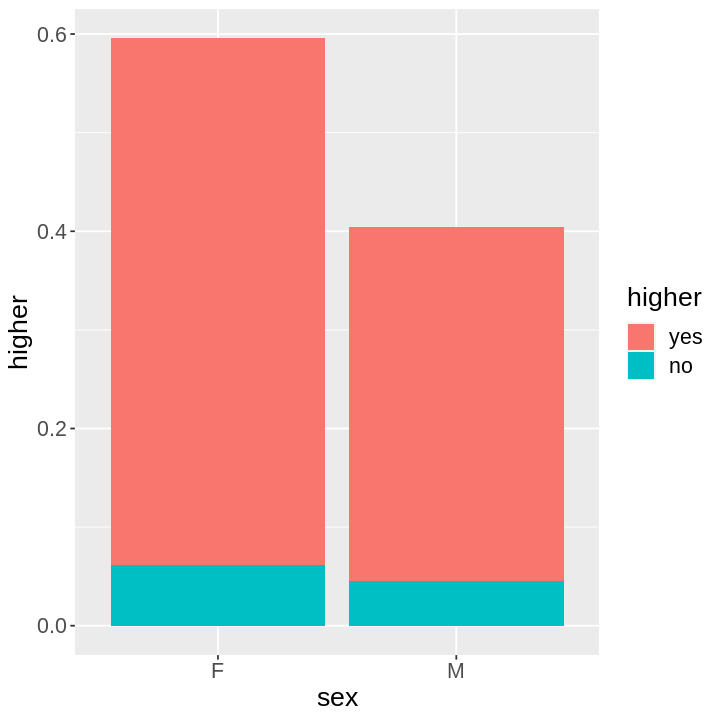

In [4]:
options(repr.plot.width=6, repr.plot.height=6)
student_gender <- student_train %>%
                select(sex, higher) %>%
                ggplot(aes(x=sex, y=higher))+
                geom_bar(aes(y = ..count../sum(..count..), fill = higher))+
                theme(text = element_text(size=16))
student_gender

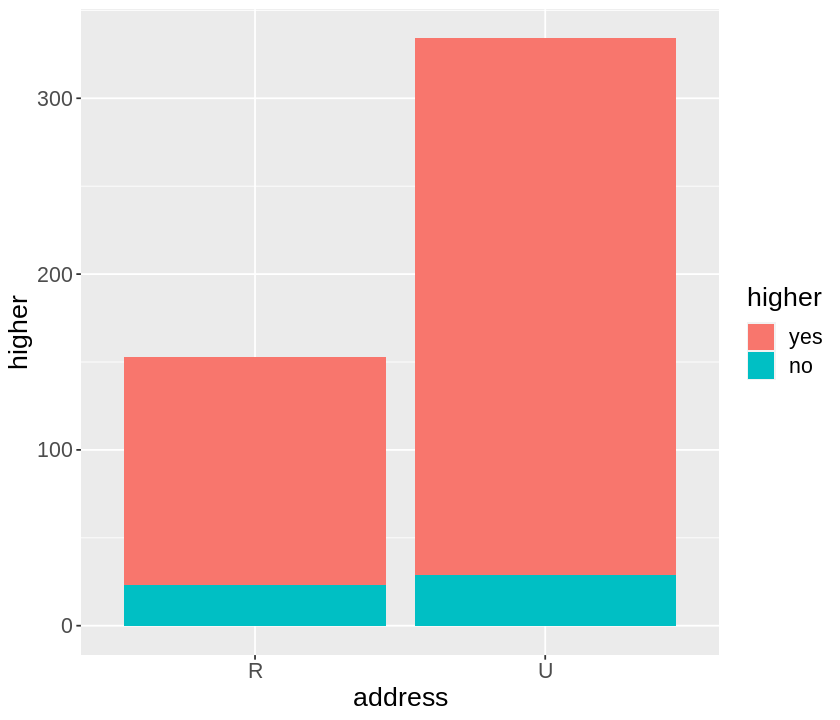

In [5]:
options(repr.plot.width=7, repr.plot.height=6)
student_address <- student_train %>%
                select(address, higher) %>%
                ggplot(aes(x=address, y=higher))+
                geom_bar(aes(y = ..count.., fill = higher))+
                theme(text = element_text(size=16))
student_address



`summarise()` regrouping output by 'address' (override with `.groups` argument)



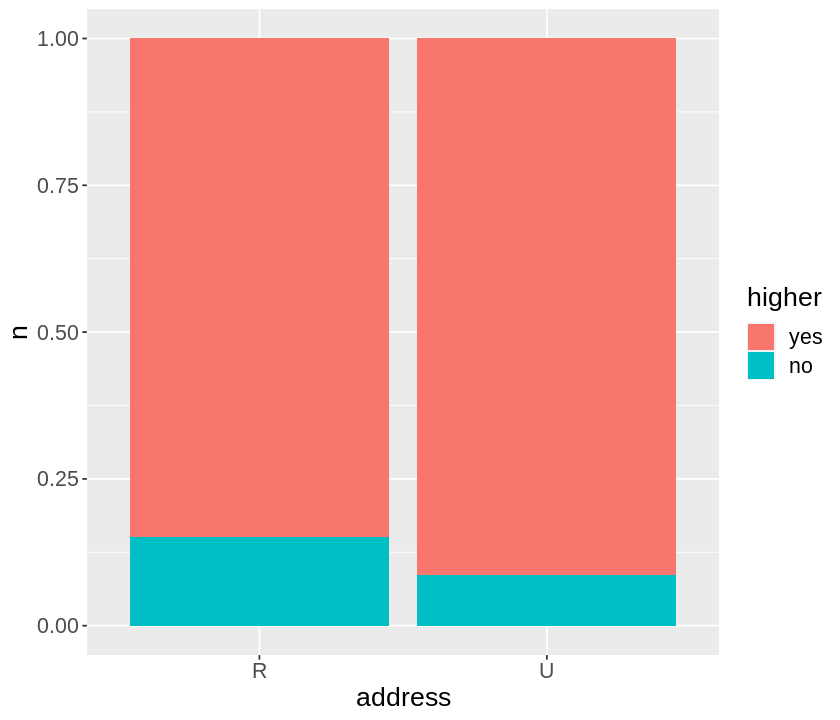

In [6]:
address_n_higher <- student_train %>%
            select(address, higher)%>%
            group_by(address, higher)%>%
            summarize(n = n())
address_plot <- ggplot(address_n_higher, aes(x = address, y = n, fill = higher)) +
                    geom_bar(stat = "identity", position = "fill")+
                theme(text = element_text(size=16))
address_plot

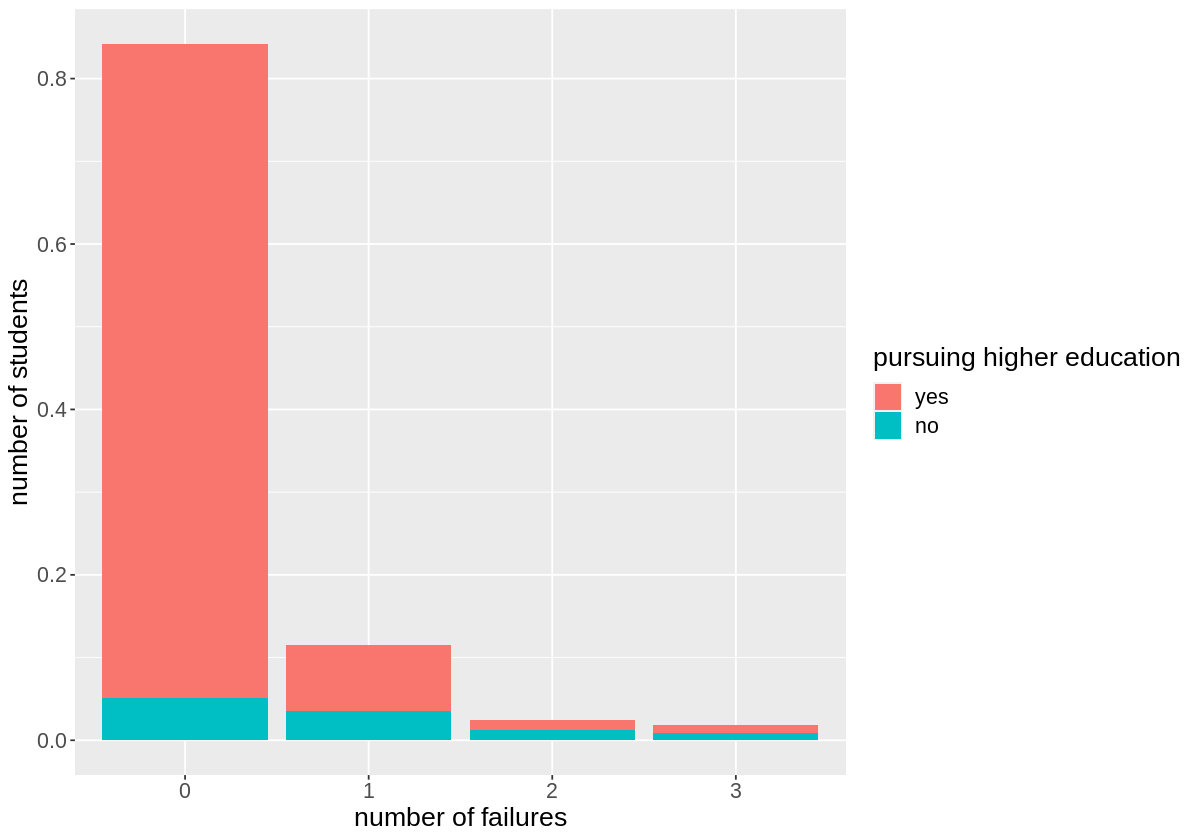

In [7]:
options(repr.plot.width=10, repr.plot.height=7)
student_failures <- student_train %>%
                select(failures, higher) %>%
                ggplot(aes(x=as.factor(failures), y=higher))+
                geom_bar(aes(y = ..count../sum(..count..), fill = higher))+
                labs(y = "number of students", x = "number of failures", fill = "pursuing higher education")+
                theme(text = element_text(size=16))
student_failures

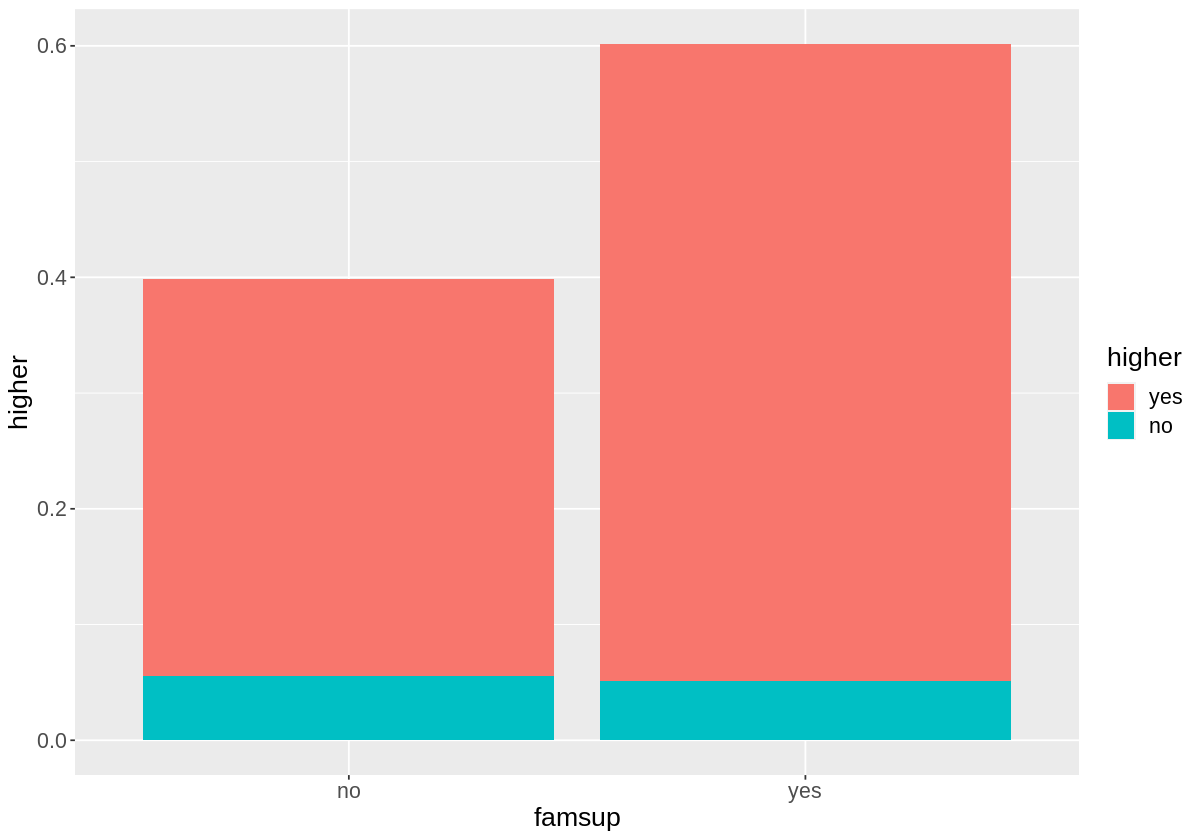

In [8]:
family_support <- student_train %>%
                select(famsup, higher) %>%
                ggplot(aes(x=famsup, y=higher))+
                geom_bar(aes(y = ..count../sum(..count..), fill = higher))+
                theme(text = element_text(size=16))
family_support